## Social Network ads prediction

We will predict wheater the user will purchase the product or not basis on gender, age and estimated salary.
we will use RandomForestClassifier to Create Machine learning model

In [1]:
# importing the necessary libraries
import joblib
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("../input/logistic-regression/Social_Network_Ads.csv")

In [3]:
# showing the DataFrame
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# checking for missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# basic exploring the dataset

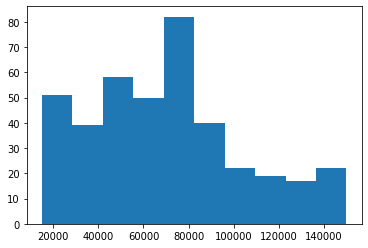

In [6]:
# checking the salary range
plt.hist(df["EstimatedSalary"])
plt.show()

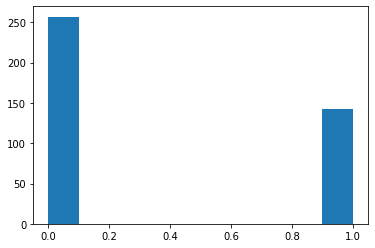

In [7]:
# we have imbalance class here
plt.hist(df["Purchased"])
plt.show()

In [8]:
# we don't need User ID for classification
# seprated the features and output

In [9]:
X = df.drop(["User ID", "Purchased"], axis =1)

In [10]:
y = df["Purchased"]

In [11]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [13]:
# we have to convert str value to numerical value to use in classifier

In [14]:
le = LabelEncoder()
X["Gender"] = le.fit_transform(X["Gender"])

In [15]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [16]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [19]:
# Spliting dataset into train and test so we can test the model performance on base of that


In [20]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8)

In [21]:
print("Shape of Training Features:", train_x.shape)
print("Shape of Testing Features:", test_x.shape)
print("Shape of output:", train_y.shape)
print("Shape of output:", test_y.shape)

Shape of Training Features: (320, 3)
Shape of Testing Features: (80, 3)
Shape of output: (320,)
Shape of output: (80,)


In [22]:
clf.fit(train_x, train_y)

RandomForestClassifier(max_depth=2, random_state=0)

In [23]:
pred_y = clf.predict(test_x)

In [24]:
# we will evalute the model performance here

In [25]:
print("Accuracy Score:", accuracy_score(test_y, pred_y))

Accuracy Score: 0.95


In [26]:
print("Confusion Metrix:\n", confusion_matrix(test_y, pred_y))

Confusion Metrix:
 [[48  2]
 [ 2 28]]


In [27]:
joblib.dump(clf, "classifier.pkl")

['classifier.pkl']

In [28]:
# we can use flask server to use classifier.pkl to predict the output